# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to Akasa Air only.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/akasa-air] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [22]:
base_url = "https://www.airlinequality.com/airline-reviews/akasa-air"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 168 total reviews
Scraping page 3
   ---> 168 total reviews
Scraping page 4
   ---> 168 total reviews
Scraping page 5
   ---> 168 total reviews
Scraping page 6
   ---> 168 total reviews
Scraping page 7
   ---> 168 total reviews
Scraping page 8
   ---> 168 total reviews
Scraping page 9
   ---> 168 total reviews
Scraping page 10
   ---> 168 total reviews


In [24]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,Not Verified | The worst aircraft service eve...
1,Not Verified | I was supposed to fly at 10:50 ...
2,Not Verified | I and my family reported 5 min...
3,Not Verified | It took more than 2 hours to ge...
4,Not Verified | Awful service and food that is...
...,...
163,Not Verified | Firstly the flight was delayed...
164,✅ Trip Verified | Never be flying with 'Akasa ...
165,✅ Trip Verified | I travelled twice within a s...
166,✅ Trip Verified | I don't know where to start...


In [25]:
df.to_csv('Reviews.csv')

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [26]:
import pandas as pd

# Read the CSV file into a DataFrame
df



,reviews
0,Not Verified | The worst aircraft service eve...
1,Not Verified | I was supposed to fly at 10:50 ...
2,Not Verified | I and my family reported 5 min...
3,Not Verified | It took more than 2 hours to ge...
4,Not Verified | Awful service and food that is...
...,...
163,Not Verified | Firstly the flight was delayed...
164,✅ Trip Verified | Never be flying with 'Akasa ...
165,✅ Trip Verified | I travelled twice within a s...
166,✅ Trip Verified | I don't know where to start...


In [27]:
# Define a function to remove verification status if present
def remove_text_until_pipe(review_text):
    # Find the position of the '|'
    pipe_index = review_text.find('|')
    if pipe_index != -1:
        # Return text after the '|', trimmed of leading and trailing spaces
        return review_text[pipe_index + 1:].strip()
    return review_text




In [28]:
# Apply the function to the 'Review' column
df['reviews'] = df['reviews'].apply(remove_text_until_pipe)

# Save the cleaned DataFrame to a new CSV file
df.to_csv('Cleaned_Reviews.csv', index=False)

In [29]:
import pandas as pd

# Specify the encoding when reading the CSV file
df2 = pd.read_csv('Cleaned_Reviews.csv')

# Display the first few rows of the DataFrame to verify
print(df2.head())

                                             reviews
0  The worst aircraft service ever. Starting from...
1  I was supposed to fly at 10:50 AM today, but f...
2  I and my family reported 5 mins late to Akasa ...
3  It took more than 2 hours to get the boarding ...
4  Awful service and food that is impossible to e...


In [30]:
df2['reviews']=df2['reviews'].str.lstrip()
df2


,reviews
0,The worst aircraft service ever. Starting from...
1,"I was supposed to fly at 10:50 AM today, but f..."
2,I and my family reported 5 mins late to Akasa ...
3,It took more than 2 hours to get the boarding ...
4,Awful service and food that is impossible to e...
...,...
163,Firstly the flight was delayed by one hour and...
164,Never be flying with 'Akasa Air' again I am a ...
165,I travelled twice within a span of three weeks...
166,"I don't know where to start, this airline is a..."


In [31]:
df2['reviews']=df2['reviews'].str.lstrip()
df2['reviews']

0      The worst aircraft service ever. Starting from...
1      I was supposed to fly at 10:50 AM today, but f...
2      I and my family reported 5 mins late to Akasa ...
3      It took more than 2 hours to get the boarding ...
4      Awful service and food that is impossible to e...
                             ...                        
163    Firstly the flight was delayed by one hour and...
164    Never be flying with 'Akasa Air' again I am a ...
165    I travelled twice within a span of three weeks...
166    I don't know where to start, this airline is a...
167    Newest of all Indian airlines, started just 2 ...
Name: reviews, Length: 168, dtype: object

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Prepare the text data
reviews = df2['reviews']

# Convert text data to a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews)

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Print topics
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))


Topic #1:
flight akasa air customer staff check airline airport great pm
Topic #2:
flight akasa air experience airline booked time service crew passengers
Topic #3:
akasa flight air airline staff time pet travel fly experience
Topic #4:
flight time akasa staff experience air airline boarding worst hours
Topic #5:
flight check airline minutes akasa customer staff airport service counter


In [33]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


                                             reviews  Sentiment
0  The worst aircraft service ever. Starting from...  -0.158125
1  I was supposed to fly at 10:50 AM today, but f...  -0.010714
2  I and my family reported 5 mins late to Akasa ...   0.164286
3  It took more than 2 hours to get the boarding ...  -0.082292
4  Awful service and food that is impossible to e...  -0.433333


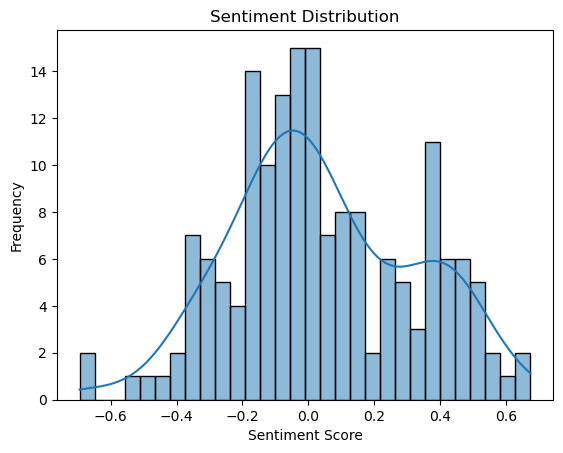

In [34]:
from textblob import TextBlob

# Add a column for sentiment
df2['Sentiment'] = df2['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the first few rows with sentiment
print(df2.head())

# Plot sentiment distribution
import seaborn as sns

sns.histplot(df2['Sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [54]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -------------------- ------------------- 153.6/300.2 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


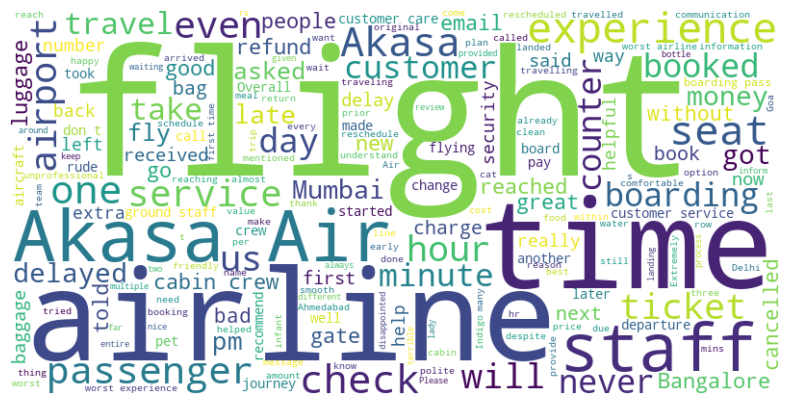

In [35]:
from wordcloud import WordCloud

# Combine all reviews into a single string
text = ' '.join(df2['reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


                                             reviews  Sentiment  Polarity  \
0  The worst aircraft service ever. Starting from...    -0.5789 -0.158125   
1  I was supposed to fly at 10:50 AM today, but f...    -0.9230 -0.010714   
2  I and my family reported 5 mins late to Akasa ...    -0.7230  0.164286   
3  It took more than 2 hours to get the boarding ...    -0.5849 -0.082292   
4  Awful service and food that is impossible to e...    -0.7660 -0.433333   

   Subjectivity Sentiment Category  Sentiment Score  
0      0.339375           Negative          -0.5789  
1      0.775000           Negative          -0.9230  
2      0.578571           Negative          -0.7230  
3      0.565551           Negative          -0.5849  
4      0.700000           Negative          -0.7660  


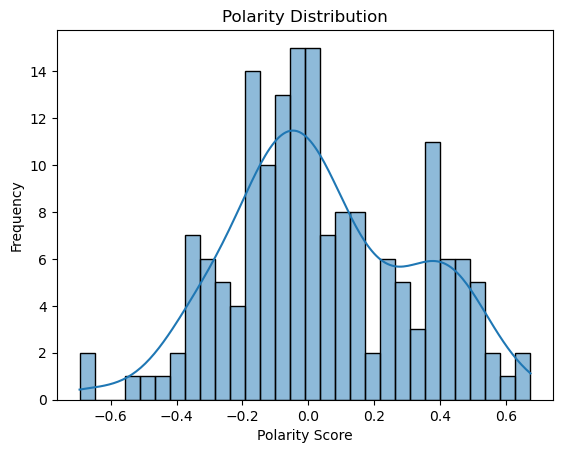

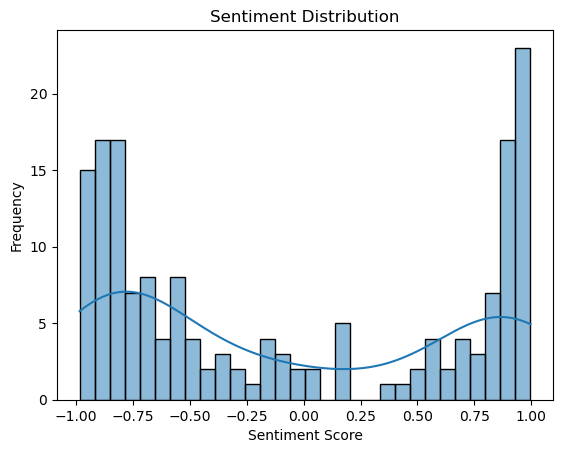

In [50]:
from textblob import TextBlob
import pandas as pd

# Apply TextBlob sentiment analysis
df2['Polarity'] = df2['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df2['Subjectivity'] = df2['reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Display the first few rows
print(df2.head())

# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df2['Polarity'], bins=30, kde=True)
plt.title('Polarity Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()
sns.histplot(df2['Sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()



In [70]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd


# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis
df2['Sentiment'] = df2['reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Display the first few rows
print(df2.head())

                                             reviews  Sentiment  Polarity  \
0  The worst aircraft service ever. Starting from...    -0.5789 -0.158125   
1  I was supposed to fly at 10:50 AM today, but f...    -0.9230 -0.010714   
2  I and my family reported 5 mins late to Akasa ...    -0.7230  0.164286   
3  It took more than 2 hours to get the boarding ...    -0.5849 -0.082292   
4  Awful service and food that is impossible to e...    -0.7660 -0.433333   

   Subjectivity  
0      0.339375  
1      0.775000  
2      0.578571  
3      0.565551  
4      0.700000  


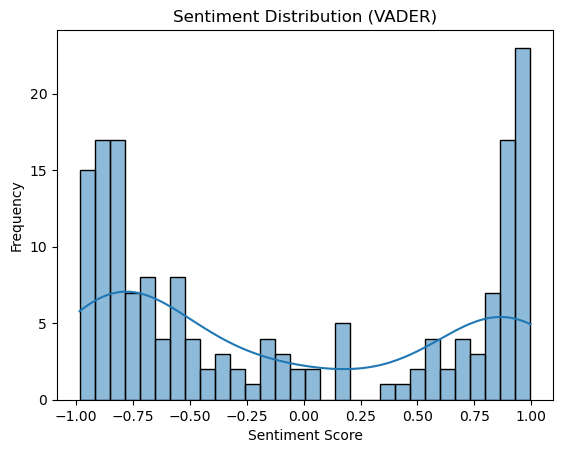

In [38]:
# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df2['Sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution (VADER)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [39]:
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df2['Sentiment Category'] = df2['Sentiment'].apply(classify_sentiment)

# Group by sentiment category and count
sentiment_counts = df2['Sentiment Category'].value_counts()

# Display the counts
print(sentiment_counts)

Negative    96
Positive    71
Neutral      1
Name: Sentiment Category, dtype: int64


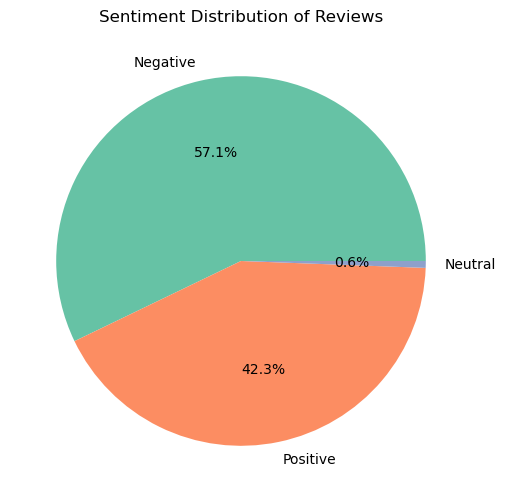

In [40]:
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Sentiment Distribution of Reviews')
plt.show()

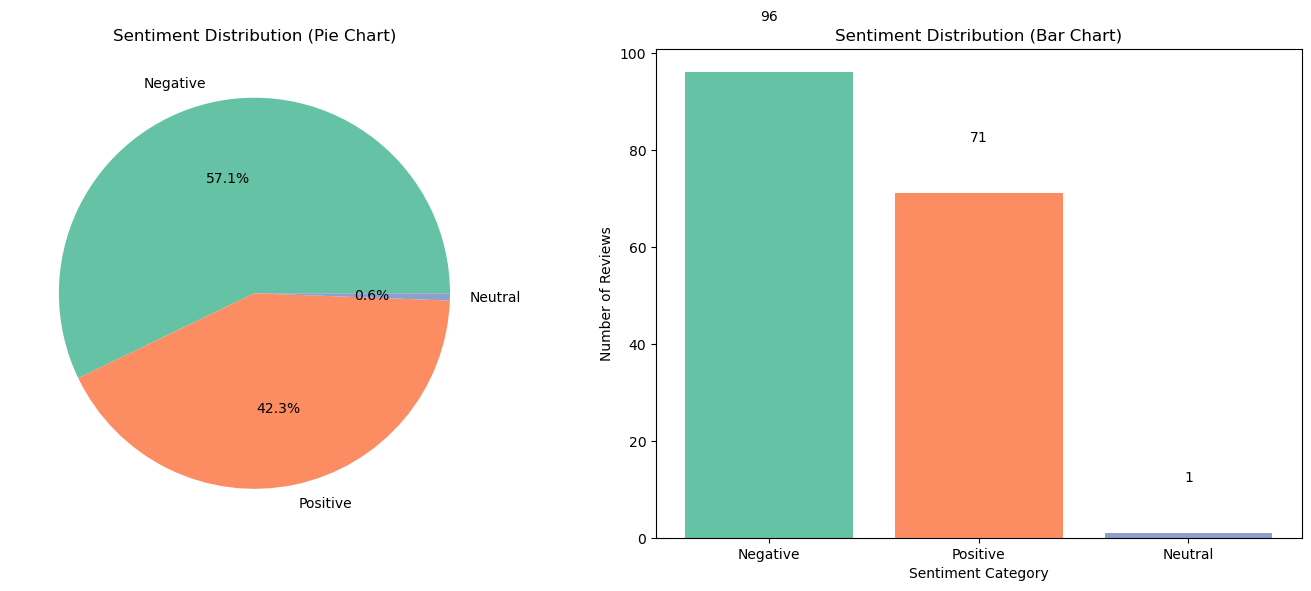

In [41]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
axs[0].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
axs[0].set_title('Sentiment Distribution (Pie Chart)')

# Bar chart
axs[1].bar(sentiment_counts.index, sentiment_counts.values, color=['#66c2a5', '#fc8d62', '#8da0cb'])
axs[1].set_title('Sentiment Distribution (Bar Chart)')
axs[1].set_xlabel('Sentiment Category')
axs[1].set_ylabel('Number of Reviews')

# Annotate counts on the bar chart
for i, value in enumerate(sentiment_counts.values):
    axs[1].text(i, value + 10, str(value), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
# Create DataFrames for positive and negative reviews
df_positive = df2[df2['Sentiment Category'] == 'Positive']
df_negative = df2[df2['Sentiment Category'] == 'Negative']

# Display the first few rows of each DataFrame
print("Positive Reviews DataFrame:")
print(df_positive.head())

print("\nNegative Reviews DataFrame:")
print(df_negative.head())

Positive Reviews DataFrame:
                                              reviews  Sentiment  Polarity  \
6   I’m utterly disgusted with the service provide...     0.1878 -0.043311   
7   My grandfather traveled from Delhi to Mumbai i...     0.9584  0.455000   
11  We had a fantastic flight, it arrived early to...     0.8882  0.496875   
12  Thanks Gaurav and team, it was a memorable one...     0.8930  0.656250   
13  Thank you so much for your service however the...     0.9901  0.197396   

    Subjectivity Sentiment Category  
6       0.521053           Positive  
7       0.620000           Positive  
11      0.712500           Positive  
12      0.737500           Positive  
13      0.420312           Positive  

Negative Reviews DataFrame:
                                             reviews  Sentiment  Polarity  \
0  The worst aircraft service ever. Starting from...    -0.5789 -0.158125   
1  I was supposed to fly at 10:50 AM today, but f...    -0.9230 -0.010714   
2  I and my fam

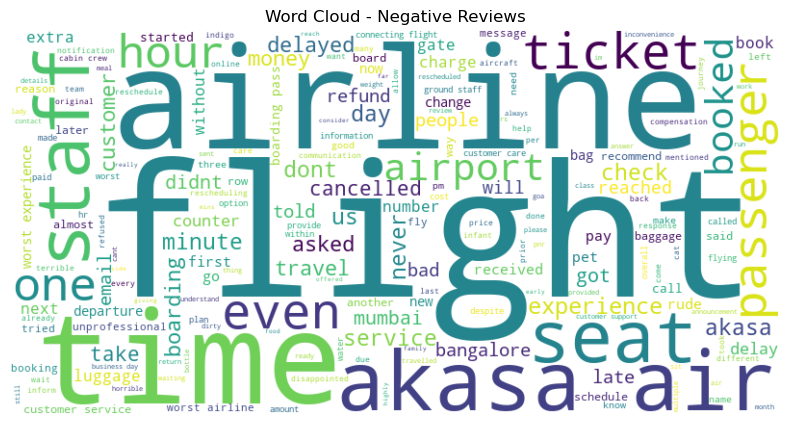

In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re


# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis
df2['Sentiment Score'] = df2['reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify sentiments
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df2['Sentiment Category'] = df2['Sentiment Score'].apply(classify_sentiment)

# Create DataFrame for negative reviews
df_negative = df2[df2['Sentiment Category'] == 'Negative']

# Function to clean and tokenize text
def preprocess_text(text):
    # Remove punctuation and lower case
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text.split()

# Preprocess text for negative reviews
negative_words = [word for review in df_negative['reviews'] for word in preprocess_text(review)]

# Generate WordCloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews')
plt.show()


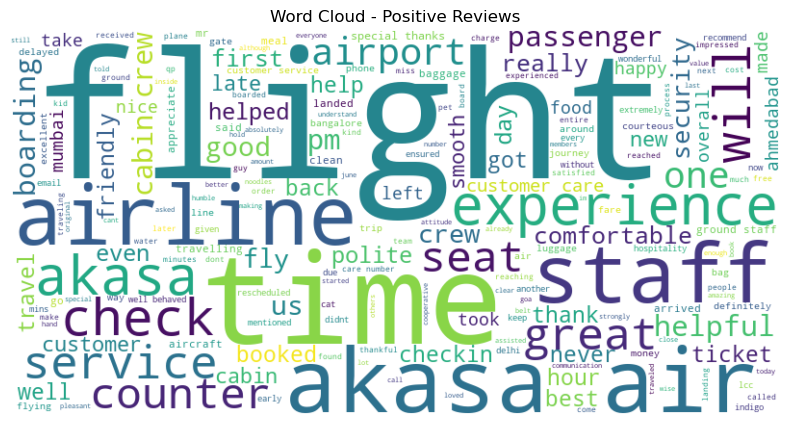

In [44]:
# Create DataFrame for positive reviews
df_positive = df2[df2['Sentiment Category'] == 'Positive']

# Function to clean and tokenize text
def preprocess_text(text):
    # Remove punctuation and lower case
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text.split()

# Preprocess text for positive reviews
positive_words = [word for review in df_positive['reviews'] for word in preprocess_text(review)]

# Generate WordCloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')
plt.show()

In [45]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from collections import Counter
import re

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis
df2['Sentiment Score'] = df2['reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify sentiments
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df2['Sentiment Category'] = df2['Sentiment Score'].apply(classify_sentiment)

# Create DataFrames for positive and negative reviews
df_positive = df2[df2['Sentiment Category'] == 'Positive']
df_negative = df2[df2['Sentiment Category'] == 'Negative']

# Function to clean and tokenize text
def preprocess_text(text):
    # Remove punctuation and lower case
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text.split()

# Preprocess text for positive and negative reviews
positive_words = [word for review in df_positive['reviews'] for word in preprocess_text(review)]
negative_words = [word for review in df_negative['reviews'] for word in preprocess_text(review)]

# Count and display top 5 most common words
def top_words(words, num=5):
    return Counter(words).most_common(num)

print("Top 5 Major Drivers in Positive Reviews:")
print(top_words(positive_words))

print("\nTop 5 Major Drivers in Negative Reviews:")
print(top_words(negative_words))


Top 5 Major Drivers in Positive Reviews:
[('the', 236), ('and', 214), ('was', 148), ('to', 147), ('i', 137)]

Top 5 Major Drivers in Negative Reviews:
[('the', 481), ('to', 326), ('and', 292), ('i', 257), ('was', 168)]


In [101]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from collections import Counter
import re


# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis
df2['Sentiment Score'] = df2['reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify sentiments
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df2['Sentiment Category'] = df2['Sentiment Score'].apply(classify_sentiment)

# Create DataFrames for positive and negative reviews
df_positive = df2[df2['Sentiment Category'] == 'Positive']
df_negative = df2[df2['Sentiment Category'] == 'Negative']

# Function to clean and tokenize text
def preprocess_text(text):
    # Remove punctuation and lower case
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    # Tokenize and filter out short words
    return [word for word in text.split() if len(word) >= 4]

# Preprocess text for positive and negative reviews
positive_words = [word for review in df_positive['reviews'] for word in preprocess_text(review)]
negative_words = [word for review in df_negative['reviews'] for word in preprocess_text(review)]

# Count and display top 5 most common words
def top_words(words, num=5):
    return Counter(words).most_common(num)

print("Top 5 Major Drivers in Positive Reviews:")
print(top_words(positive_words))

print("\nTop 5 Major Drivers in Negative Reviews:")
print(top_words(negative_words))


Top 5 Major Drivers in Positive Reviews:
[('flight', 852), ('with', 639), ('were', 564), ('that', 474), ('this', 444)]

Top 5 Major Drivers in Negative Reviews:
[('flight', 1101), ('they', 787), ('that', 771), ('with', 759), ('were', 527)]


In [47]:
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from collections import Counter
import re

# Download stop words from NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords


# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis
df2['Sentiment Score'] = df2['reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify sentiments
def classify_sentiment(score):
    if score > 0.5:
        return 'Positive'
    elif score < -.2:
        return 'Negative'
    else:
        return 'Neutral'

df2['Sentiment Category'] = df2['Sentiment Score'].apply(classify_sentiment)

# Create DataFrames for positive and negative reviews
df_positive = df2[df2['Sentiment Category'] == 'Positive']
df_negative = df2[df2['Sentiment Category'] == 'Negative']

# Load NLTK stop words
stop_words = set(stopwords.words('english'))

# Custom stop words and exclusions
custom_exclusions = set(['flight', 'airline', 'akasa','boarding', 'ticket', 'time','airways', 'baggage','british', 'checkin', 'gate', 'departure', 'arrival'])

# Function to clean and tokenize text
def preprocess_text(text):
    # Remove punctuation and lower case
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    # Tokenize and filter out short words, stop words, and custom exclusions
    return [word for word in text.split() if len(word) >= 4 and word not in stop_words and word not in custom_exclusions]

# Preprocess text for positive and negative reviews
positive_words = [word for review in df_positive['reviews'] for word in preprocess_text(review)]
negative_words = [word for review in df_negative['reviews'] for word in preprocess_text(review)]

# Count and display top 5 most common words
def top_words(words, num=5):
    return Counter(words).most_common(num)

print("Top 5 Major Drivers in Positive Reviews:")
print(top_words(positive_words))

print("\nTop 5 Major Drivers in Negative Reviews:")
print(top_words(negative_words))

[nltk_data] Downloading package stopwords to C:\Users\Anurag
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 5 Major Drivers in Positive Reviews:
[('staff', 34), ('experience', 25), ('crew', 25), ('cabin', 24), ('service', 21)]

Top 5 Major Drivers in Negative Reviews:
[('staff', 40), ('experience', 39), ('service', 36), ('even', 35), ('customer', 32)]


In [48]:
# Count word frequencies
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

# Function to plot word frequencies as bar graphs
def plot_word_frequencies(word_freq, title, color):
    words, freqs = zip(*word_freq.most_common(10))  # Get top 10 words
    plt.figure(figsize=(12, 6))
    plt.bar(words, freqs, color=color)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

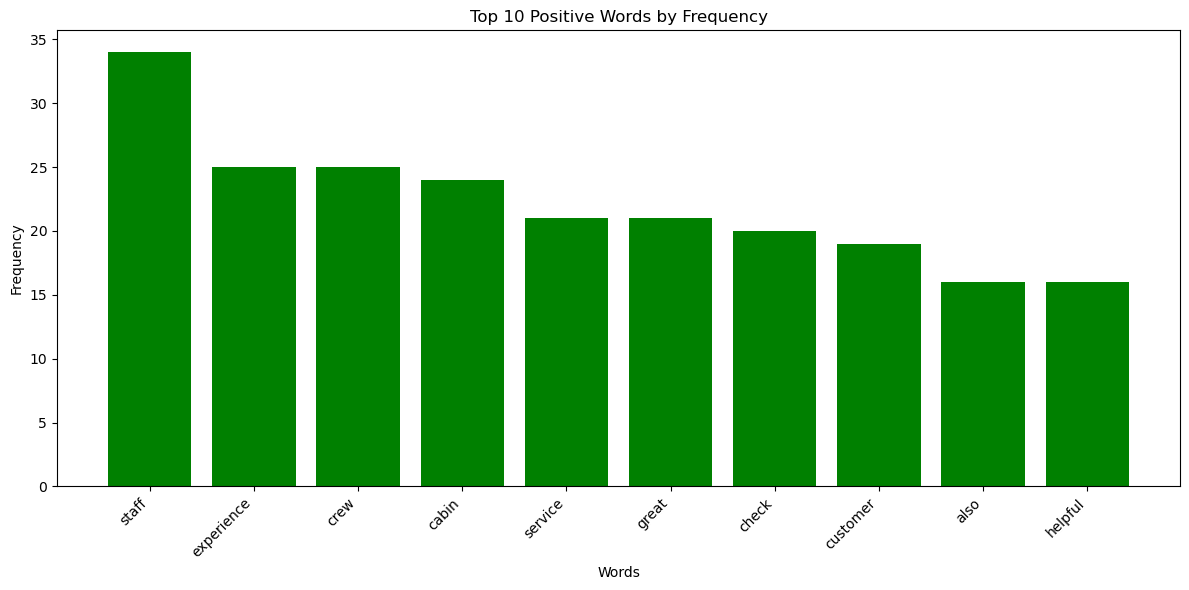

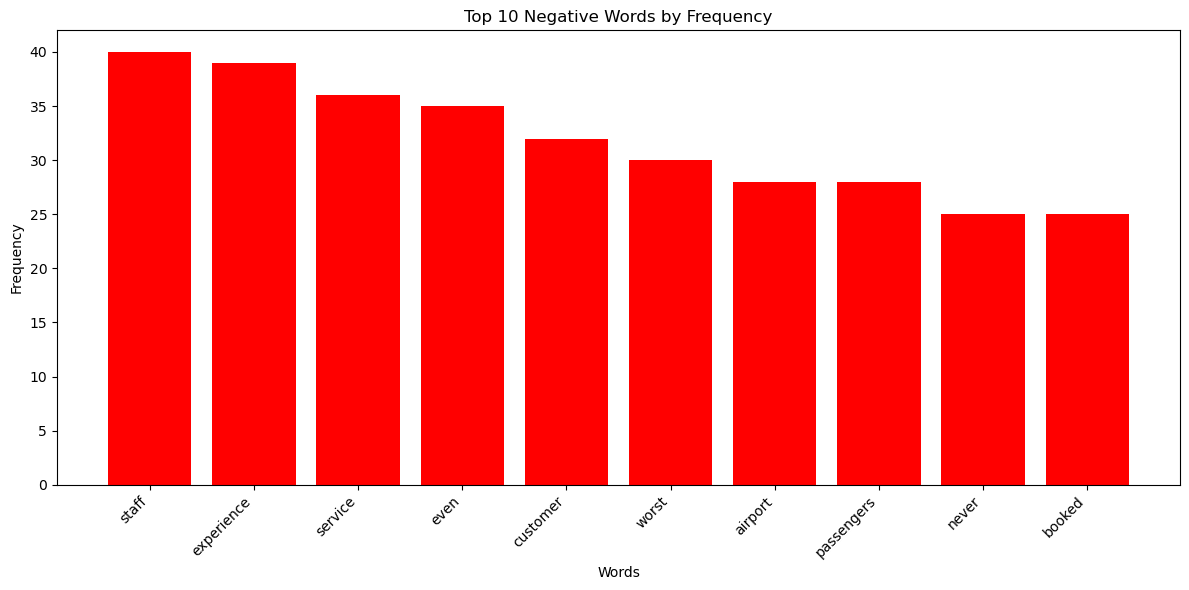

In [49]:
# Plot bar graphs
plot_word_frequencies(positive_word_freq, 'Top 10 Positive Words by Frequency', 'green')
plot_word_frequencies(negative_word_freq, 'Top 10 Negative Words by Frequency', 'red')